In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_excel('new test.xlsx')

## EDA

In [3]:
data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


Λαμβανουμε πληροφοριες για το συνολο δεδομενων και κοιταζουμε αν υπαρχουν κενες τιμες 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner phenomenon                        366 non-null    int64 
 5   polygonal papules                         366 non-null    int64 
 6   follicular papules                        366 non-null    int64 
 7   oral mucosal involvement                  366 non-null    int64 
 8   knee and elbow involvement                366 non-null    int64 
 9   scalp involvement                         366 non-null    int64 
 10  family history                            366 non-

Καθως ολες οι στηλες ειναι κατηγορηματικες,ελεγχουμε για μοναδικες τιμες σε καθε στηλη

In [5]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())
    

[2 3 1 0] 	 4
[2 3 1 0] 	 4
[0 3 2 1] 	 4
[3 2 0 1] 	 4
[0 1 2 3] 	 4
[0 3 2 1] 	 4
[0 3 1 2] 	 4
[0 3 2 1] 	 4
[1 0 3 2] 	 4
[0 1 2 3] 	 4
[0 1] 	 2
[0 1 2 3] 	 4
[0 2 1] 	 3
[0 1 3 2] 	 4
[0 3 1 2] 	 4
[3 1 0 2] 	 4
[2 3 1 0] 	 4
[0 2 1 3] 	 4
[0 2 3 1] 	 4
[0 2 1 3] 	 4
[0 2 3 1] 	 4
[0 2 3 1] 	 4
[0 2 1 3] 	 4
[0 1 2 3] 	 4
[0 2 3 1] 	 4
[0 3 2 1] 	 4
[0 2 3 1] 	 4
[3 0 2 1] 	 4
[0 2 3 1] 	 4
[0 1 2 3] 	 4
[0 2 1 3] 	 4
[1 2 3 0] 	 4
[0 3 1 2] 	 4
['55' '8' '26' '40' '45' '41' '18' '57' '22' '30' '20' '21' '10' '65' '38'
 '23' '17' '51' '42' '44' '33' '43' '50' '34' '?' '15' '46' '62' '35' '48'
 '12' '52' '60' '32' '19' '29' '25' '36' '13' '27' '31' '28' '64' '39'
 '47' '16' '0' '7' '70' '37' '61' '67' '56' '53' '24' '58' '49' '63' '68'
 '9' '75'] 	 61
[2 1 3 5 4 6] 	 6


Ελεγχουμε τις τιμες εχουν συμπεριληφθει σε καθε κατηγορια

In [6]:
for i in data.columns:
    print(data[i].value_counts())
    print()

2    215
3     90
1     57
0      4
Name: erythema, dtype: int64

2    195
1    111
3     52
0      8
Name: scaling, dtype: int64

2    168
1     93
0     59
3     46
Name: definite borders, dtype: int64

0    118
2    100
3     76
1     72
Name: itching, dtype: int64

0    224
1     70
2     54
3     18
Name: koebner phenomenon, dtype: int64

0    297
2     41
3     27
1      1
Name: polygonal papules, dtype: int64

0    333
2     16
1     11
3      6
Name: follicular papules, dtype: int64

0    299
2     45
3     13
1      9
Name: oral mucosal involvement, dtype: int64

0    251
2     64
1     28
3     23
Name: knee and elbow involvement, dtype: int64

0    264
2     56
1     30
3     16
Name: scalp involvement, dtype: int64

0    320
1     46
Name: family history, dtype: int64

0    296
2     46
3     16
1      8
Name: melanin incontinence, dtype: int64

0    324
1     33
2      9
Name: eosinophils in the infiltrate, dtype: int64

0    235
1     69
2     55
3      7
Name: PNL infilt

Απο τα παραπανω στοιχεια βλεπουμε πως εχουν κατηγοροιπηθει οι ασθενεις σε καθε χαρακτηριστικο και στο τελος και στις κλασεις 

Παρακατω βλεπουμε ποσοι ασθενεις υπαρχουν σε καθε κλαση

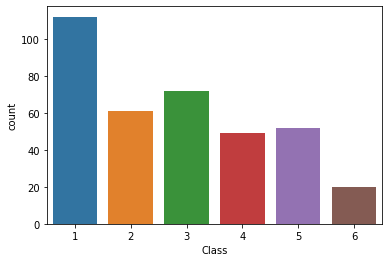

In [7]:
sns.countplot(data['Class'])

Φαινεται στις κλασεις δεν ειναι ολες ισοποσες υπαρχει αισθητη διαφορα της πρωτης και της εκτης απο τις υπολοιπες.

Και παρακατω βλεπουμε πως εχουν διανεμηθει οι κλασεις σε καθε χαρακτηριστικο 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


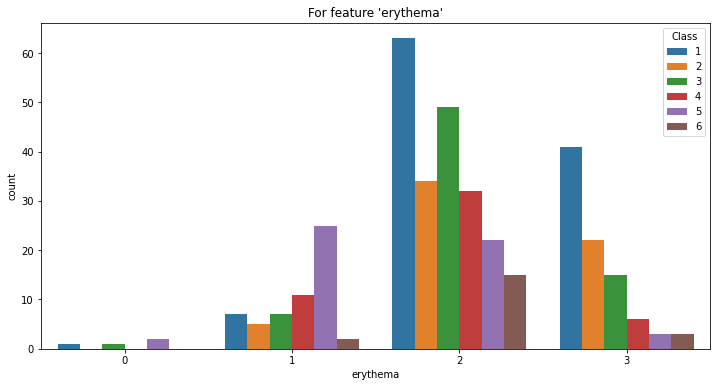

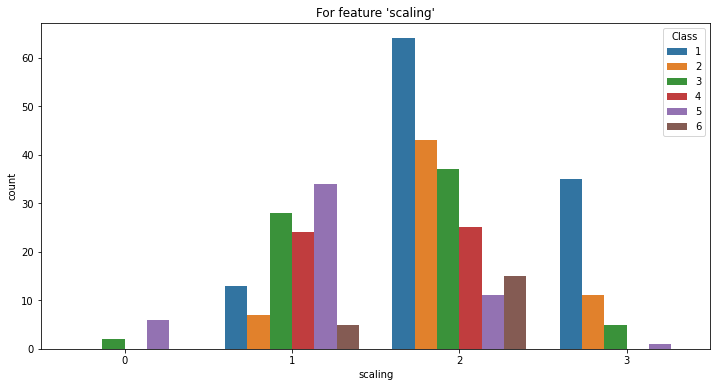

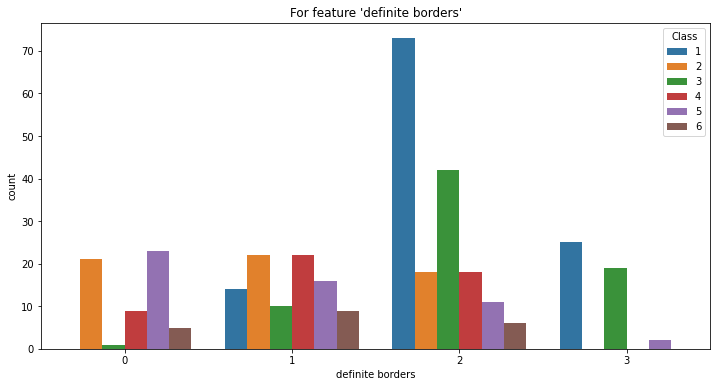

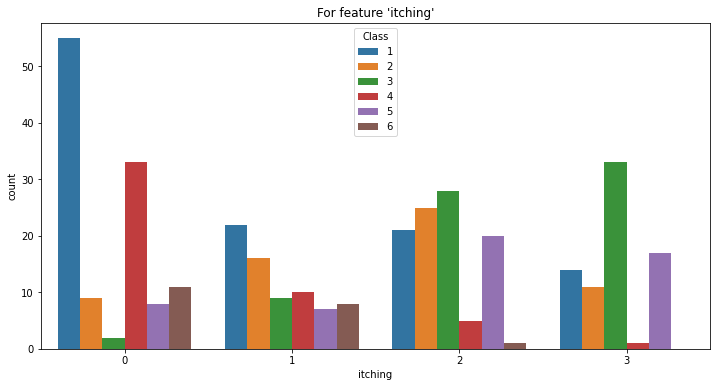

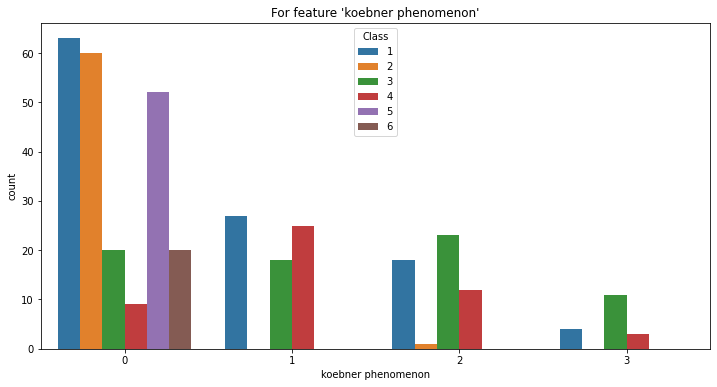

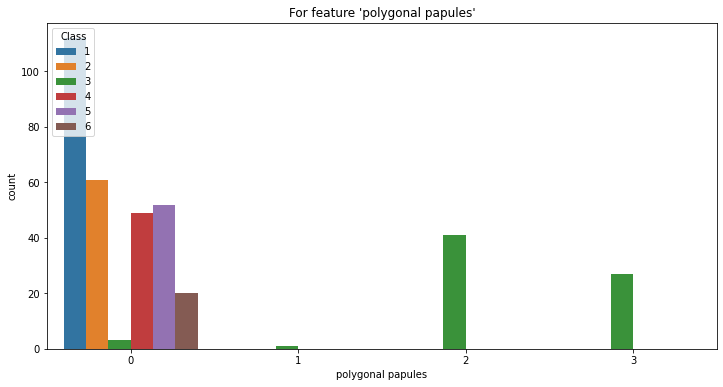

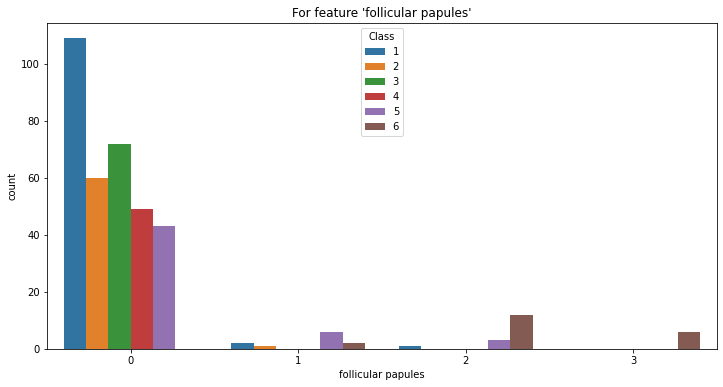

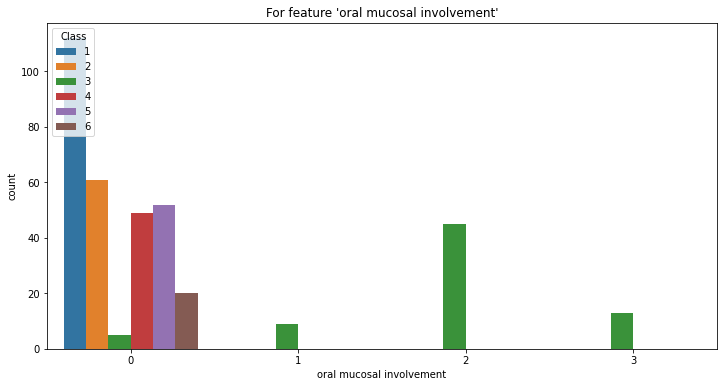

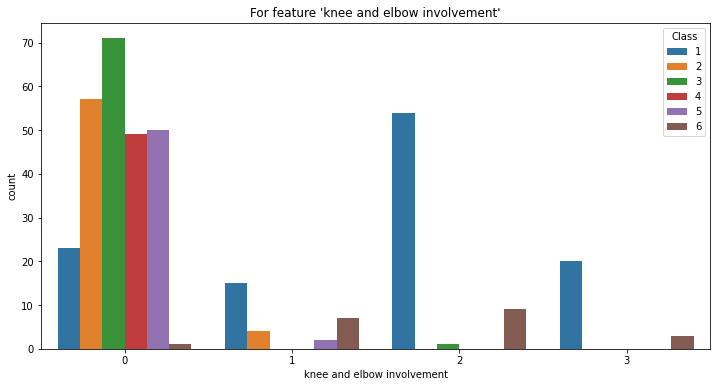

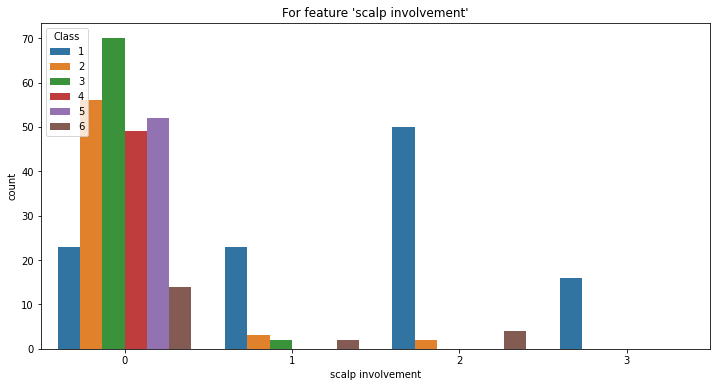

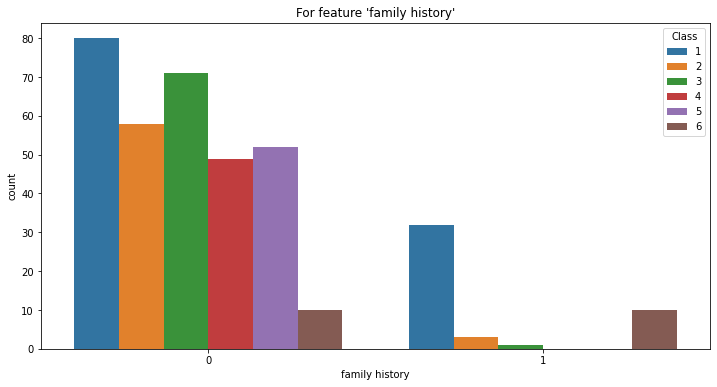

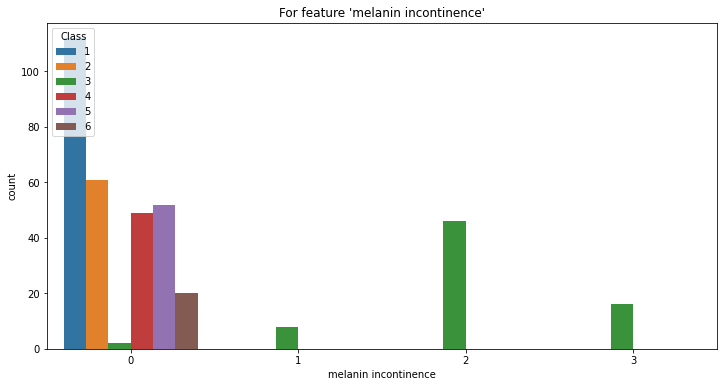

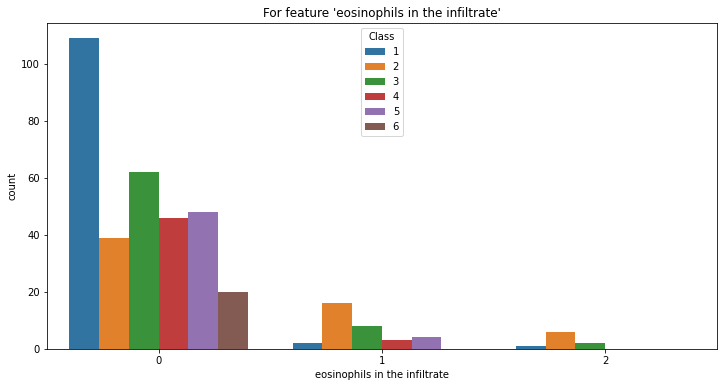

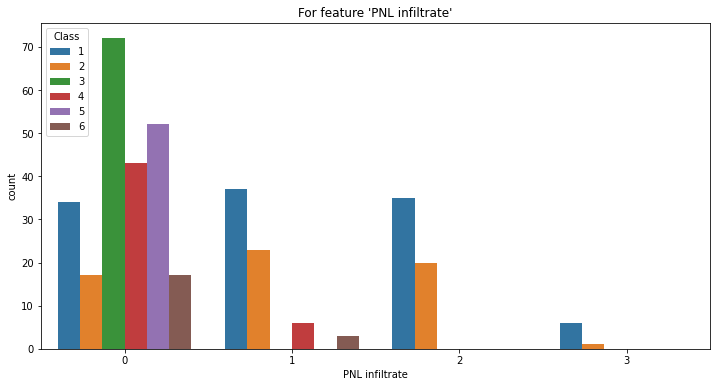

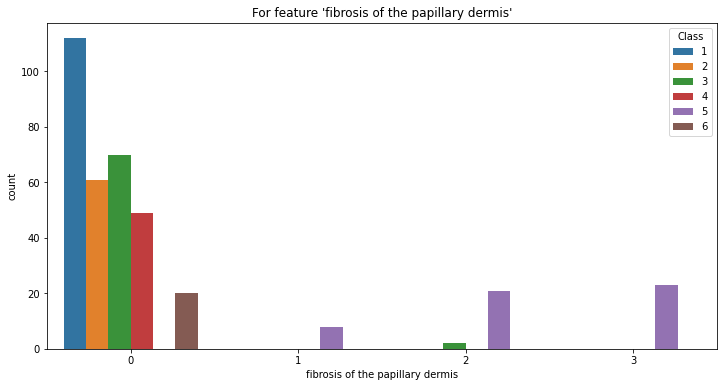

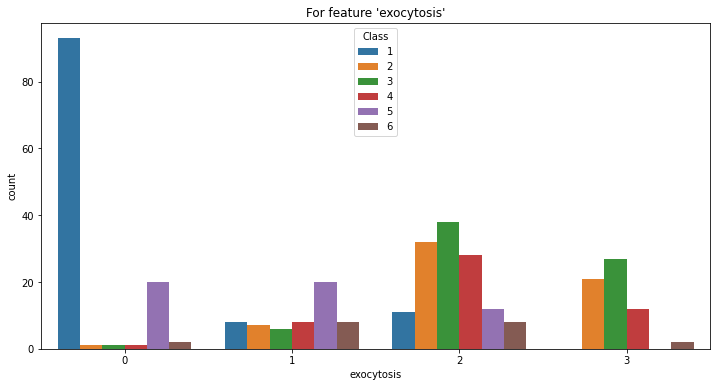

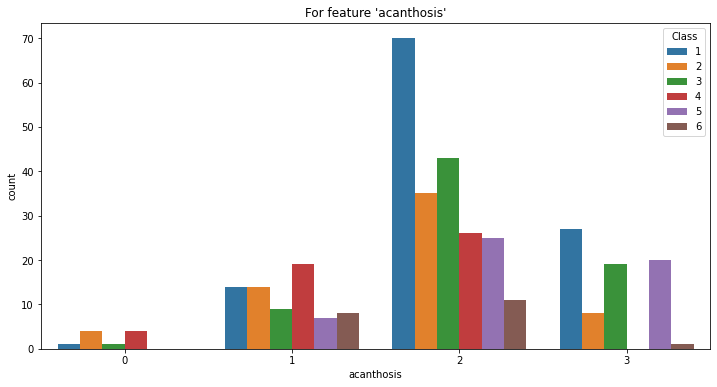

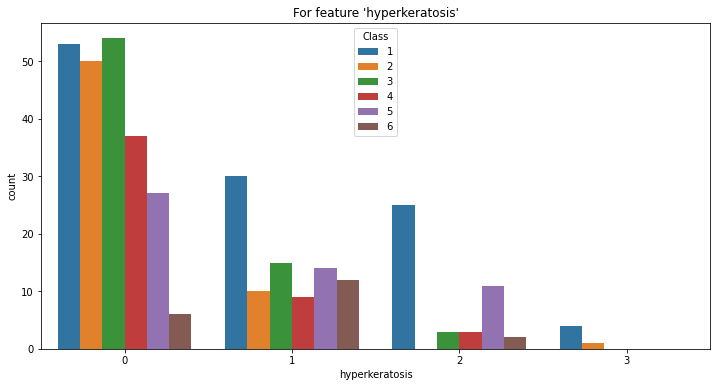

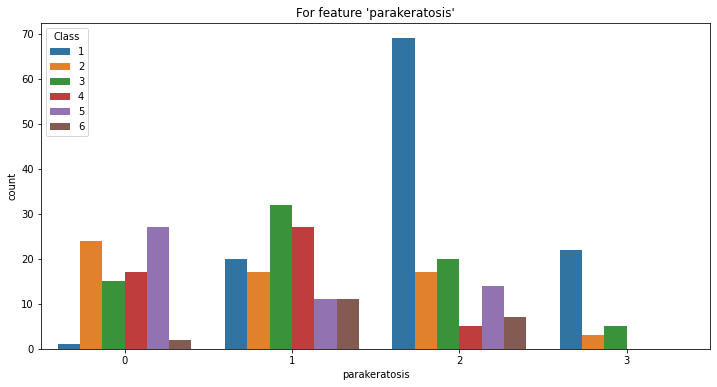

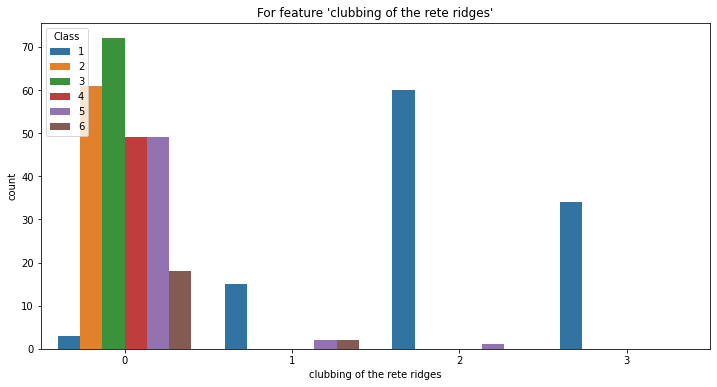

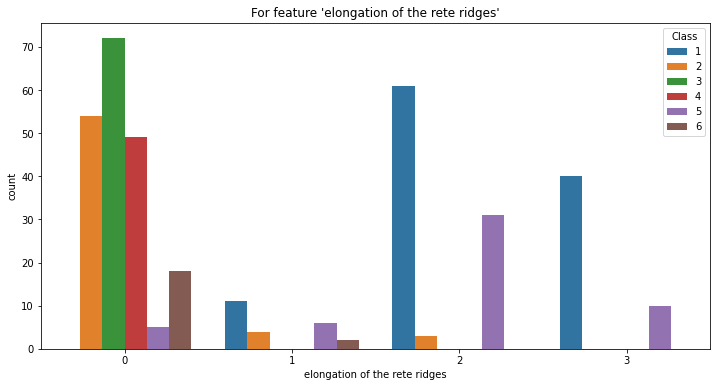

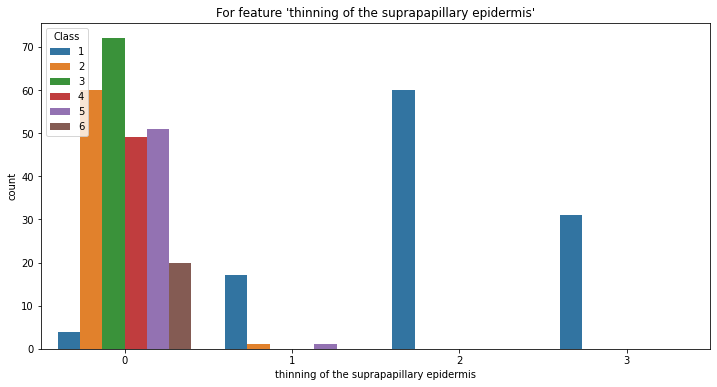

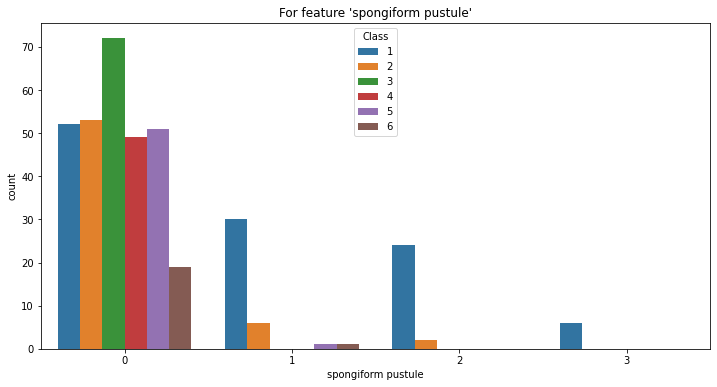

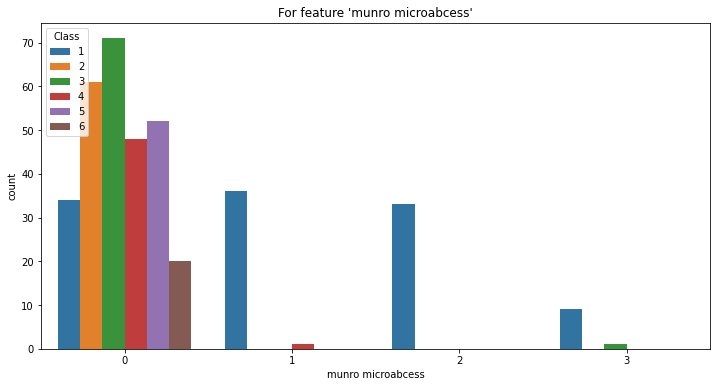

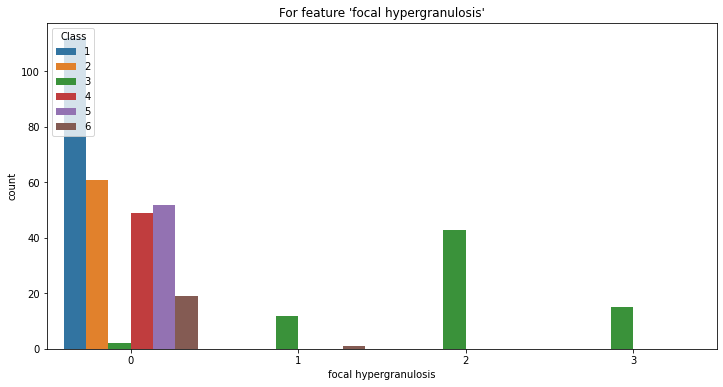

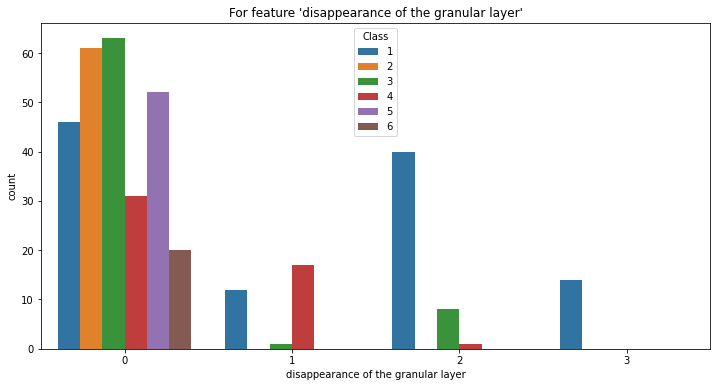

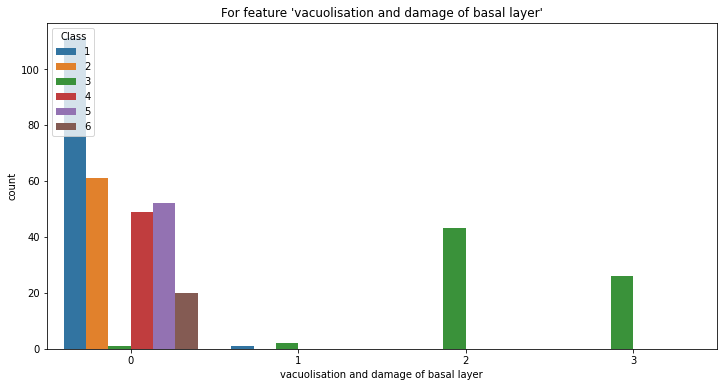

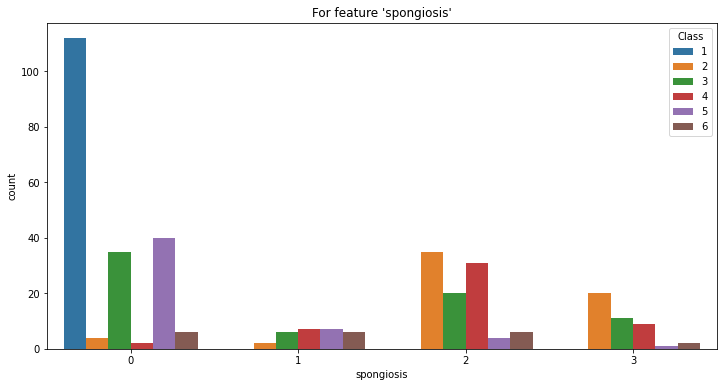

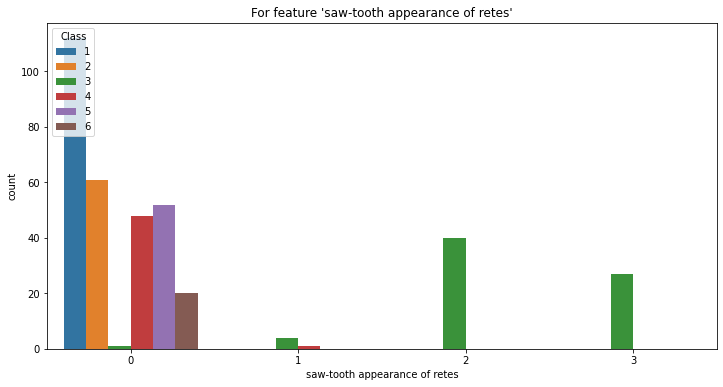

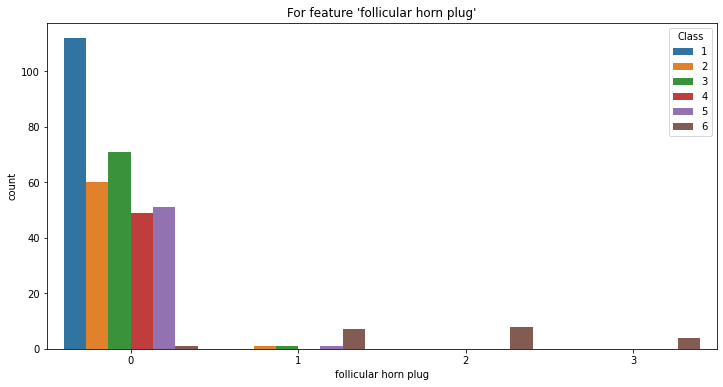

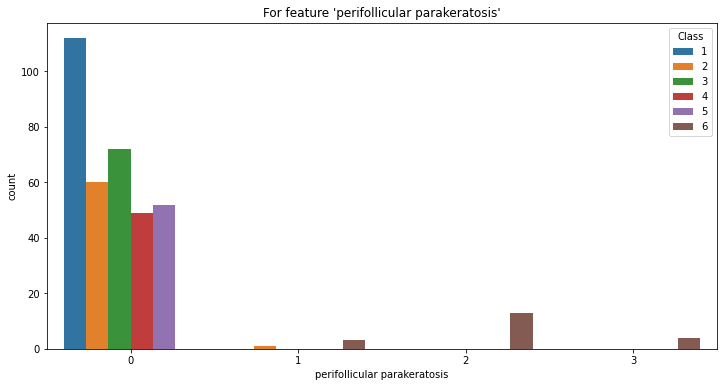

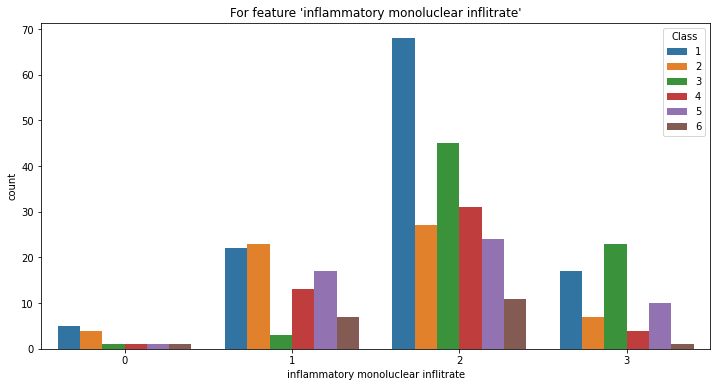

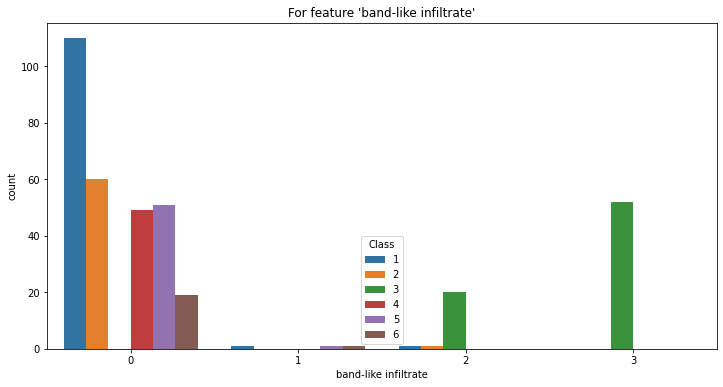

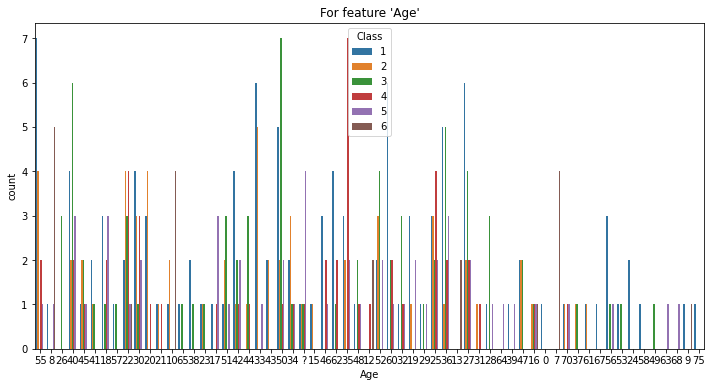

In [8]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['Class'])

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le=LabelEncoder()

In [0]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [12]:
data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,43,1
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,58,0
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,15,2
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,29,0
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,34,2


Ο χαρτης θερμοτητας των στηλων του αρχειο μας δειχνει τον συντελεστη συσχετισης Pearson's μεταξυ των στηλων

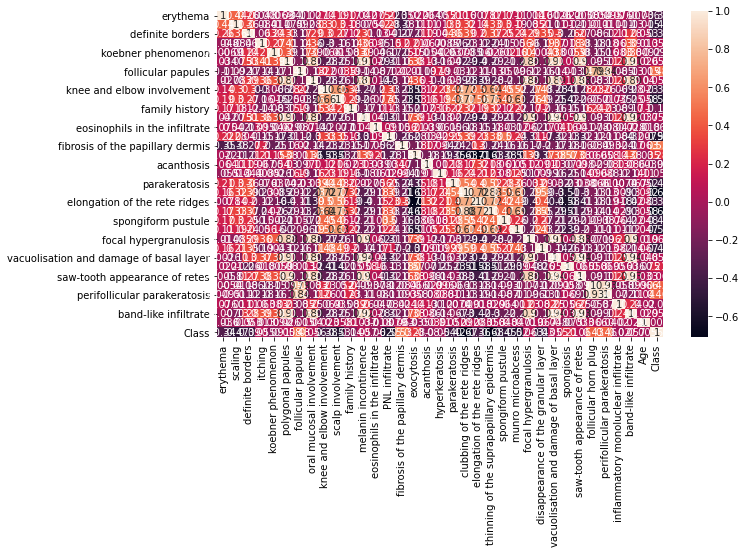

In [13]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

X ειναι το πλαισιο δεδομενων που περιεχει δεδομενα εισοδου/χαρακτηριστηκα

y ειναι η σειρα που περιεχει αποτελεσματα που θα προβλεφτουν

In [0]:
X=data[data.columns[:-1]]
y=data['Class']

In [15]:
X.head(2)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,43
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,58


Χωριζουμε τα δεδομενα σε train and test 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Selection

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.grid_search import GridSearchCV

In [0]:
from sklearn.model_selection import learning_curve,GridSearchCV

### Logistic Regression

In [0]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [21]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred=logreg.predict(X_test)

In [23]:
logreg.score(X_test,y_test)

0.9727272727272728

Γενικα η  logistic regression μας δινει μια καλη ακριβεια. Παμε να ελεξουμε τις καμπυλες 

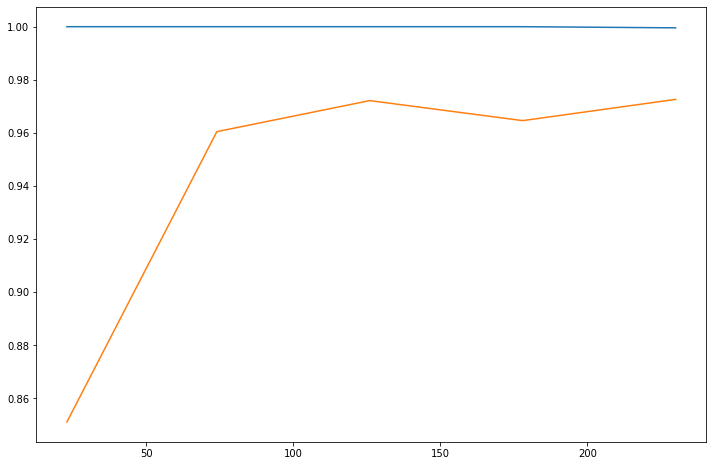

In [24]:
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

Απο το παραπανω γραφημα με τα δειγματα που εχει παρει βλεπουμε οτι η ακριβεια παραμενει καπου η ιδια .

Στην συνεχεια προσπαθησα να τροποποιησω την παραμετρο τακτοποιησης 

In [0]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,X_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1,)

In [26]:
curve

(array([[0.27941176, 0.28292683, 0.29756098, 0.29268293, 0.27804878],
        [0.62745098, 0.60487805, 0.65365854, 0.61463415, 0.65365854],
        [0.98529412, 0.99512195, 0.9902439 , 0.99512195, 1.        ],
        [0.99509804, 1.        , 0.99512195, 0.99512195, 1.        ]]),
 array([[0.30769231, 0.2745098 , 0.2745098 , 0.2745098 , 0.29411765],
        [0.59615385, 0.68627451, 0.60784314, 0.60784314, 0.52941176],
        [0.98076923, 1.        , 0.96078431, 1.        , 0.96078431],
        [0.96153846, 1.        , 0.96078431, 1.        , 0.96078431]]))

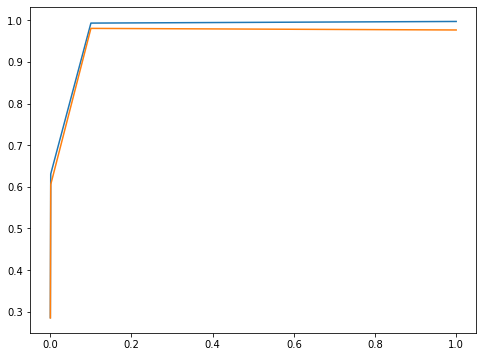

In [27]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

Ειναι φανερο οτι το C=0.1 μας δινει ενα  παρα πολυ καλο αποτελεσμα .

Τωρα καθως ειναι μια ταξινομηση πολλαπλων κλασεων μια και το αρχειο μας ειναι μικροτερο μπορω να χρησιμοποιησω  το GridSearch για να παρω τις καλυτερες παραμετρους 

In [0]:
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [30]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.9844645550527904


Με τις παραπανω παραμετρους περνουμε ακριβεια γυρω στο 98,5% 

### KNN Classifier

Τωρα θα δοκιμασω και τον KNN

In [0]:
knn=KNeighborsClassifier(n_jobs=-1)

In [33]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)


0.8363636363636363

Μας δινει ακριβεια γυρω στο 83,6 % που δεν ειναι και πολυ καλο ποσοστο

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.59      0.62      0.61        16
           2       1.00      1.00      1.00        19
           3       0.53      0.60      0.56        15
           4       0.87      0.81      0.84        16
           5       0.75      0.75      0.75         4

    accuracy                           0.84       110
   macro avg       0.79      0.79      0.79       110
weighted avg       0.85      0.84      0.84       110



Τωρα ελεγχω για διαφορες παραμετρους για 'n-γειτονες'.Μπορεις να το κανεις απευθειας με το grid_Search αλλα το εκανα χρησιμοποιωντας το κωδικα παρακατω για να απεικονισω τη επιδραση των 'n_γειτονων'

In [0]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

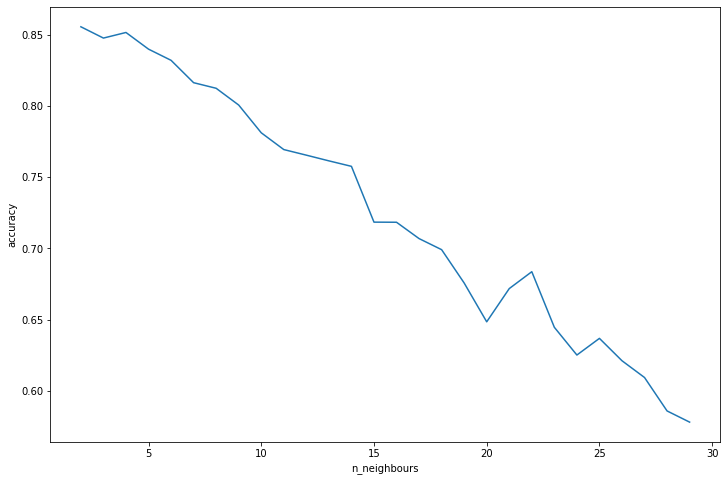

In [36]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

Οποτε και παλι με τον ΚΝΝ παιρνουμε μονο γυρω στο 83-86% ακριβεια 

### Random Forests Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [0]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [39]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average='macro'))

0.9636363636363636
0.9565826330532213


Με το RFC παιρνουμε γυρω στο 95,6% ακριβεια

Τωρα ελεγχω την επιδραση των 'n_εκτιμητων' του μοντελου

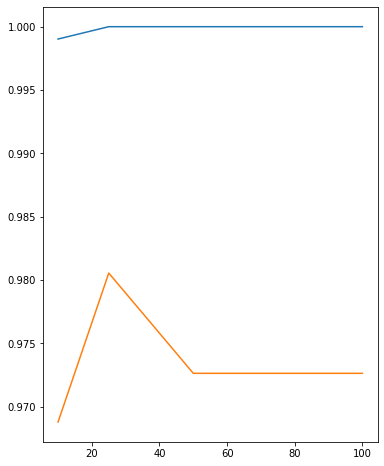

In [40]:
param_range=[10,25,50,100]
curve=validation_curve(rfc,X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

Οποτε με την αυξηση των 'n_εκτιμητων' το ποσοστο ακριβειας αυξανεται. το μοντελο εκτιμα καλυτερα οταν οι 'n_εκτιμητες'=50 ειδαλως μετα αρχιζει το overfitting.Τωρα εχουμε γυρω στο 98%

Ελεγχω τωρα πως το μοντελο ταιριαζει σε διαφορες τιμες των 'max_features'.

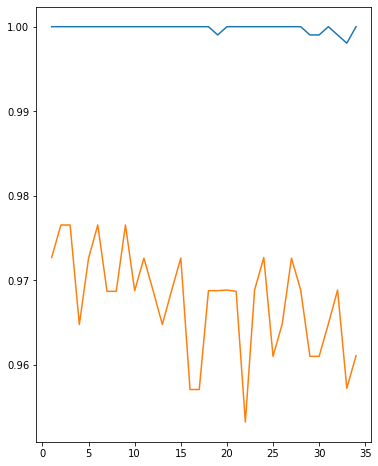

In [41]:
param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),X_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

Απο το παραπανω γραφημα το μοντελο μας δινει γυρω στο 97%


Μπορουμε επισης να ελεξουμε για αλλες παραμετρους οπως 'max_depth'με τον πιο πανω κωδικα. Ακομα ενας ευκολος τροπος ειναι να χρησιμοποιησουμε το Gridsearch για να παρουμε ενα συνδιασμο απο τις καλυτερες παραμετρους 

In [0]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [0]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [44]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                    

In [45]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None}
0.9843076923076925


Με τις παραπανω παραμετρους για το RFC εχουμε φτασει το 98.43% ποσοστο ακριβειας

## Conclusion
Random Forest Classifier και logistic regression ειναι τα καλυτερα μοντελα για αυτα τα δεδομενα με τις παραμετρους που εκχωρησαμε φτασαμε να παιρνουμε πανω απο 98% ακριβεια